In [27]:
# imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import footprint_rectangle
from skimage.filters.rank import mean
from scipy.signal import convolve2d
from skimage.filters import gaussian


Hay en total 34 niveles de intensidad


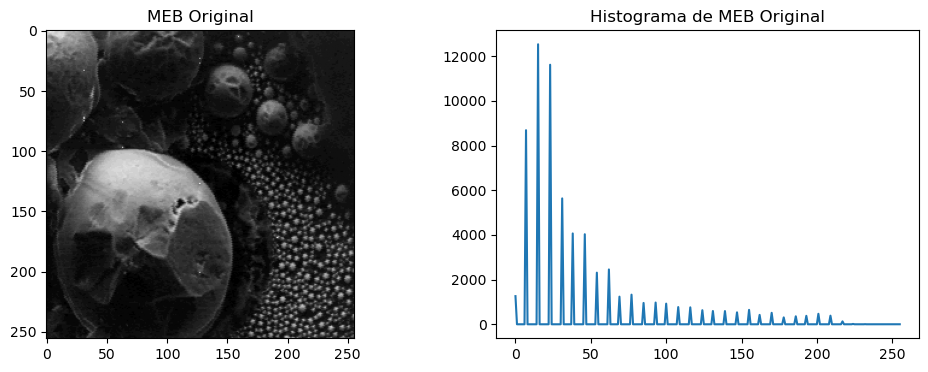

In [3]:
meb = cv2.imread('images/MEB.png', cv2.IMREAD_GRAYSCALE)
meb_hist = cv2.calcHist([meb], [0], None, [256], [0, 256])

niveles = np.count_nonzero(meb_hist)
print(f"Hay en total {niveles} niveles de intensidad")

fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].imshow(meb, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('MEB Original')
ax[1].plot(meb_hist)
ax[1].set_title('Histograma de MEB Original')
plt.show()


**Describa su forma: ¿es continuo/discontinuo?, ¿cuántos niveles de gris diferentes tiene?**

La forma del histograma es discontinua, ya que se observan picos en niveles de gris específicos separados por intervalos donde la frecuencia es aproximadamente 0, lo que indica que no todos los valores entre 0 y 255 están presentes en la imagen. Aunque el rango alcanza valores cercanos a 255, la cantidad de niveles de gris utilizados es menor que 256, pues solo ciertos niveles presentan ocurrencias.

**¿cuáles son estos niveles de gris?**

Dentro de la imagen se presentan al rededor de 34 niveles de gris dentro de la imagen.

**¿Cuantos bits tiene la imagen según el histograma**

La imagen presenta al rededor de 256 valores posibles, por lo que esta tiene un total de 8 bits.

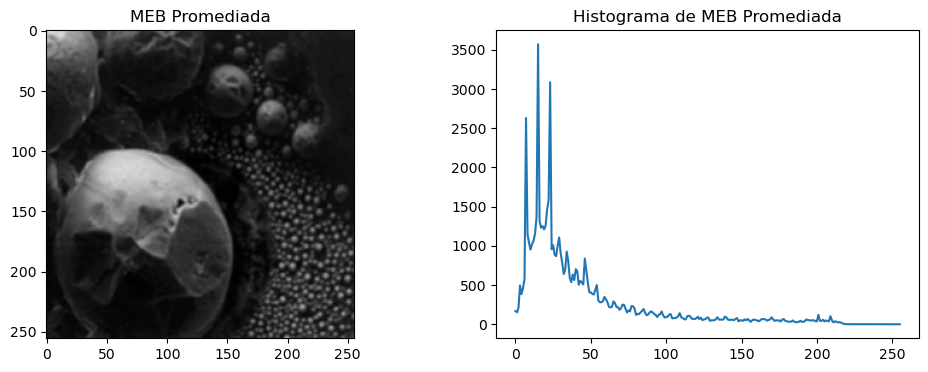

In [4]:
meb_avg = mean(meb, footprint_rectangle((3,3)))
meb_avg_hist = cv2.calcHist([meb_avg], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].imshow(meb_avg, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('MEB Promediada')
ax[1].plot(meb_avg_hist)
ax[1].set_title('Histograma de MEB Promediada')
plt.show()


**¿cómo es la imagen resultado?**

La imagen promediada se ve en grandes razgos de peor calidad dado que esta se encuentra suabizada por el filtro. En esta segunda foto se pierde detalle de luminosidad y calidad en los bordes de los circulos, se observa de forma notoria en los circulitos pequeños que se encuentran en la parte inferior de la imagen, donde en la original estos se ven bien definidos, mientras que para la segunda imagen ya se contemplan como borrosos.

**Histograma Original VS Histograma Promediado**

La diferencia más notoria entre ambos histogramas es la continuidad en la distribución de los niveles de gris. El histograma original presentaba una forma discontinua, con varios niveles cuya frecuencia era 0, generando picos aislados. En cambio, el histograma de la imagen promediada muestra una distribución más continua y uniforme, donde prácticamente no se observan intervalos con frecuencia nula. Esto se debe a que el filtro de promedio suaviza la imagen, redistribuyendo las intensidades y generando nuevos niveles intermedios, lo que produce una transición más gradual entre valores de gris.

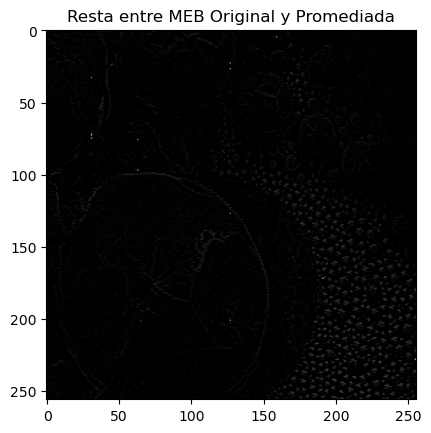

In [5]:
subtraction = cv2.subtract(meb, meb_avg)
plt.imshow(subtraction, cmap='gray', vmin=0, vmax=255)
plt.title('Resta entre MEB Original y Promediada')
plt.show()

**¿en cuáles regiones de la imagen son visibles las diferencias?, ¿por qué?**

Las diferencias se encuentran de forma más visible en el cuarto cuadrante de la imagen (abajo a la izquierda), justo donde se encuentran los circulitos mencionados anteriormente. Esto ocurre porque en esa zona existen cambios bruscos de intensidad y detalles finos que el filtro de promedio tiende a suavizar. Al realizar la resta entre la imagen original y la promediada, estas variaciones locales se resaltan, ya que representan componentes de alta frecuencia (bordes y estructuras pequeñas) que fueron atenuadas durante el suavizado.

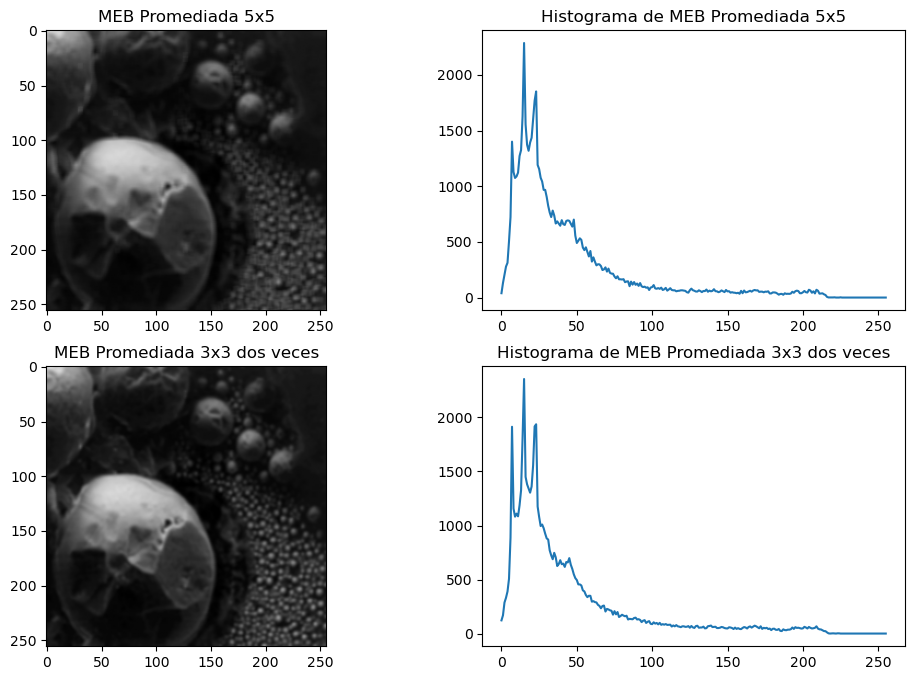

In [7]:
# Promedio con 5x5
meb_avg_5 = mean(meb, footprint_rectangle((5,5)))
meb_avg_5_hist = cv2.calcHist([meb_avg_5], [0], None, [256], [0, 256])

# Promedio con 3x3 aplicado dos veces
meb_avg_3_1 = mean(meb, footprint_rectangle((3,3)))
meb_avg_3_2 = mean(meb_avg_3_1, footprint_rectangle((3,3)))
meb_avg_3_2_hist = cv2.calcHist([meb_avg_3_2], [0], None, [256], [0, 256])

# Visualización de los resultados
fig, ax = plt.subplots(2,2, figsize=(12, 8))

ax[0,0].imshow(meb_avg_5, cmap='gray', vmin=0, vmax=255)
ax[0,0].set_title('MEB Promediada 5x5')
ax[0,1].plot(meb_avg_5_hist)
ax[0,1].set_title('Histograma de MEB Promediada 5x5')

ax[1,0].imshow(meb_avg_3_2, cmap='gray', vmin=0, vmax=255)
ax[1,0].set_title('MEB Promediada 3x3 dos veces')
ax[1,1].plot(meb_avg_3_2_hist)
ax[1,1].set_title('Histograma de MEB Promediada 3x3 dos veces')
plt.show()



**¿las dos imágenes obtenidas son idénticas?**

Las dos imágenes obtenidas no son idénticas, aunque visualmente resultan muy similares. A partir de los histogramas se observan pequeñas diferencias en la distribución de intensidades, especialmente en las zonas de bajas intensidades donde se concentran los picos principales. El filtrado 5×5 produce un suavizado más fuerte en una sola operación, mientras que aplicar un filtro 3×3 dos veces genera un efecto acumulativo que no es exactamente equivalente.

**¿por qué?**  

No son idénticas porque un promedio 5×5 en una sola operación no es matemáticamente equivalente a aplicar un promedio 3×3 dos veces. Aunque ambos generan suavizado, el kernel efectivo que resulta de aplicar 3×3 dos veces es diferente al kernel uniforme 5×5.

**¿cuál de los dos tratamientos suprime mejor los cambios de nivel de gris de la imagen?**

El filtro promedio 5×5 suprime mejor los cambios de nivel de gris que el filtro 3×3 aplicado dos veces.
Esto se debe a que el kernel 5×5 considera una vecindad mayor en una sola operación, integrando más píxeles en el cálculo del promedio y, por tanto, produciendo un suavizado más fuerte y uniforme. Como resultado, las variaciones locales de intensidad (ruido o pequeños cambios de gris) se atenúan con mayor eficacia.

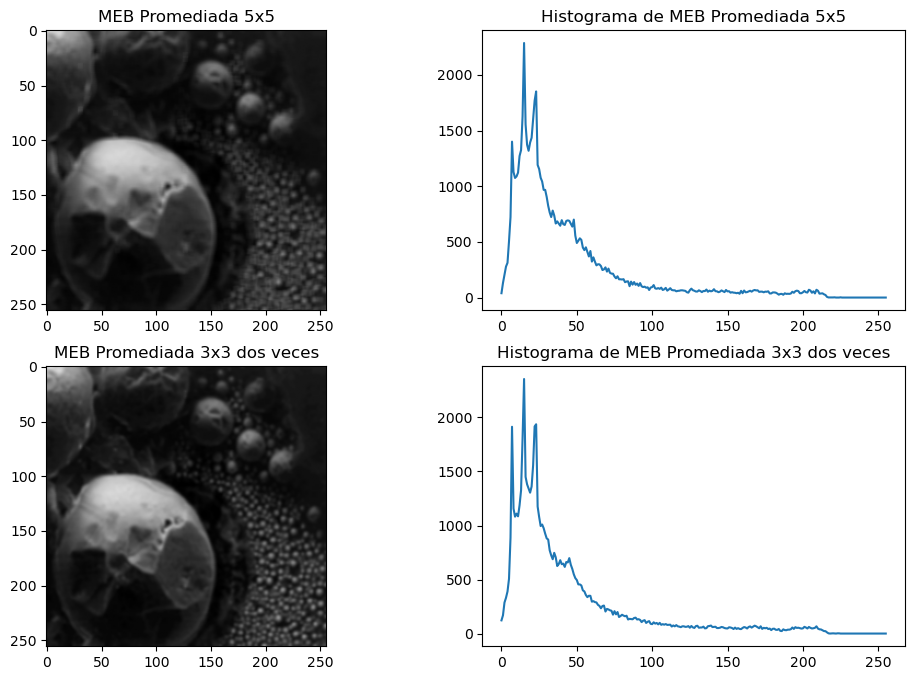

In [10]:
# Promedio con 5x5
meb_avg_5 = mean(meb, footprint_rectangle((5,5)))
meb_avg_5_hist = cv2.calcHist([meb_avg_5], [0], None, [256], [0, 256])

# Promedio con 3x3 aplicado dos veces
meb_avg_3_1 = mean(meb, footprint_rectangle((3,3)))
meb_avg_3_2 = mean(meb_avg_3_1, footprint_rectangle((3,3)))
meb_avg_3_2_hist = cv2.calcHist([meb_avg_3_2], [0], None, [256], [0, 256])

# Visualización de los resultados
fig, ax = plt.subplots(2,2, figsize=(12, 8))

ax[0,0].imshow(meb_avg_5, cmap='gray', vmin=0, vmax=255)
ax[0,0].set_title('MEB Promediada 5x5')
ax[0,1].plot(meb_avg_5_hist)
ax[0,1].set_title('Histograma de MEB Promediada 5x5')

ax[1,0].imshow(meb_avg_3_2, cmap='gray', vmin=0, vmax=255)
ax[1,0].set_title('MEB Promediada 3x3 dos veces')
ax[1,1].plot(meb_avg_3_2_hist)
ax[1,1].set_title('Histograma de MEB Promediada 3x3 dos veces')
plt.show()



In [25]:
# Mask promedio 3x3
mask3x3 = footprint_rectangle((3,3)) / 9

mask_equivalente = convolve2d(mask3x3, mask3x3, mode='full')

print("Máscara resultante (3x3 * 3x3):")
print(mask_equivalente)

print("Máscara promedio (5x5):")
mask_equivalente_5x5 = footprint_rectangle((5,5)) / 25
print(mask_equivalente_5x5)

Máscara resultante (3x3 * 3x3):
[[0.01234568 0.02469136 0.03703704 0.02469136 0.01234568]
 [0.02469136 0.04938272 0.07407407 0.04938272 0.02469136]
 [0.03703704 0.07407407 0.11111111 0.07407407 0.03703704]
 [0.02469136 0.04938272 0.07407407 0.04938272 0.02469136]
 [0.01234568 0.02469136 0.03703704 0.02469136 0.01234568]]
Máscara promedio (5x5):
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


**Con base en la forma de estas dos máscaras, justifique los resultados visuales obtenidos en el punto anterior.**

La máscara resultante de convolucionar el promedio 3×3 consigo mismo no es uniforme: presenta una forma piramidal, con mayor peso en el centro y pesos decrecientes hacia los bordes. Esto significa que los píxeles centrales influyen más en el resultado que los periféricos. En cambio, la máscara promedio 5×5 es completamente uniforme, por lo que cada píxel dentro de la ventana contribuye exactamente igual al promedio.

Debido a esta diferencia en la forma de las máscaras, el filtro 5×5 distribuye el efecto de suavizado de manera completamente uniforme, haciendo que la imagen se vea más “plana” y con menos variaciones pequeñas. En cambio, cuando se aplica el filtro 3×3 dos veces, el efecto se concentra un poco más en el centro de la ventana, por lo que aún se conservan algunos detalles leves

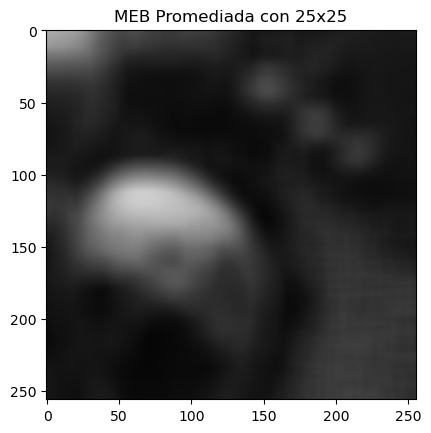

In [26]:
meb_avg_25 = mean(meb, footprint_rectangle((25,25)))

# Visualización de MEB Promediada con 25x25
plt.imshow(meb_avg_25, cmap='gray', vmin=0, vmax=255)
plt.title('MEB Promediada con 25x25')
plt.show()

**¿qué objetos de la imagen original se conservaron?**

De la imagen original quedan a la vista (de forma no muy buena igualmente) la esfera principal, acomodada en la parte inferior izquierda de la imageny la esfera que esta justo encima de esta. El resto de la imagen ya queda muy borrosa por lo que los objetos presentes no se distiguen.

**¿qué sucedió con las estructuras pequeñas presentes en la imagen original?¿por qué?**

Las estructuras pequeñas de la imagen original prácticamente desaparecen o quedan fuertemente borrosas al aplicar el filtro promedio 25×25. Esto ocurre porque el tamaño de la máscara es muy grande en comparación con el tamaño de esos detalles finos. Al promediar sobre una vecindad tan amplia, las variaciones locales de intensidad se diluyen dentro del promedio general, perdiendo contraste y definición.


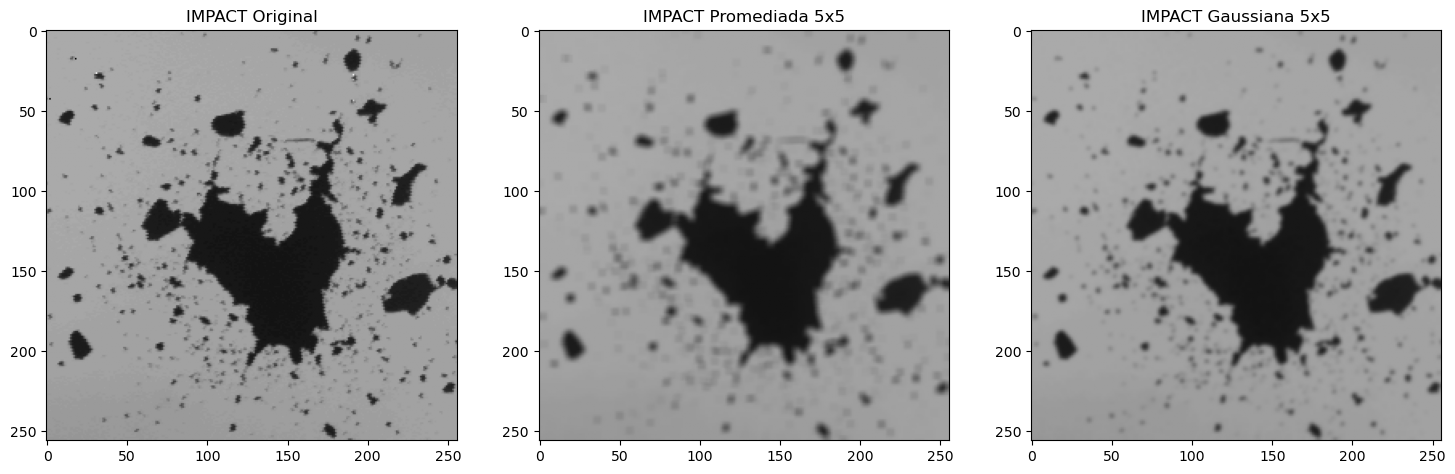

In [ ]:
impact = cv2.imread("images/IMPACT.png", cv2.IMREAD_GRAYSCALE)

# Promedio con 5x5
impact_prom = mean(impact, footprint_rectangle((5,5)))

# Gaussiano con mascara de 5x5
impact_gauss = cv2.GaussianBlur(impact, (5,5), 0)

# Visualización de los resultados
fig, ax = plt.subplots(1,3, figsize=(18, 6))
ax[0].imshow(impact, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('IMPACT Original')
ax[1].imshow(impact_prom, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('IMPACT Promediada 5x5')
ax[2].imshow(impact_gauss, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('IMPACT Gaussiana 5x5')
plt.show()

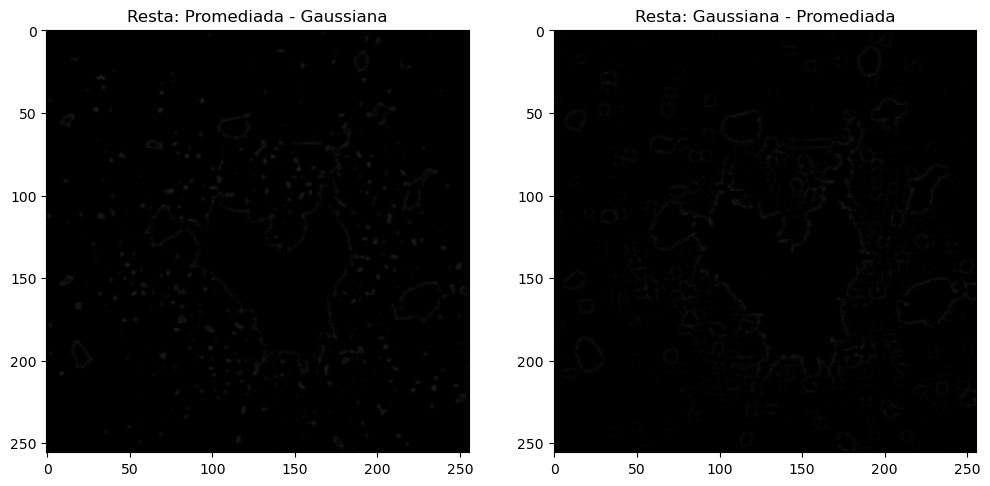

In [30]:
subtraction1 = cv2.subtract(impact_prom, impact_gauss) 
subtraction2 = cv2.subtract(impact_gauss, impact_prom)

# Visualización de las restas
fig, ax = plt.subplots(1,2, figsize=(12, 6))
ax[0].imshow(subtraction1, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Resta: Promediada - Gaussiana')
ax[1].imshow(subtraction2, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Resta: Gaussiana - Promediada')
plt.show()


**¿en cuáles regiones de la imagen son visibles las diferencias?, ¿por qué?**

Las diferencias se hacen visibles principalmente en las regiones donde existen bordes, detalles finos y cambios bruscos de intensidad. En las zonas homogéneas casi no se aprecia diferencia, ya que ambos filtros producen valores muy similares al promediar áreas uniformes. En cambio, en los contornos y estructuras pequeñas se observa mayor contraste en la imagen de diferencia porque el filtro promedio suaviza de manera uniforme toda la vecindad, mientras que el filtro gaussiano asigna mayor peso al centro y conserva mejor las transiciones.

**¿En qué casos (características de las imágenes) preferiría utilizar un filtro promedio a un filtro gaussiano y visceversa?**

Ambos filtros generan un efecto de suavizado muy similar; sin embargo, la elección depende del objetivo del procesamiento. El filtro promedio puede emplearse cuando se busca un suavizado uniforme y sencillo, por ejemplo, para atenuar variaciones pequeñas sin requerir un tratamiento especial de los bordes. El filtro gaussiano es más adecuado cuando se desea reducir ruido manteniendo mejor la forma de las estructuras principales, especialmente si la imagen será utilizada posteriormente para detección de bordes, segmentación u otros análisis donde los contornos sean relevantes.
